In [1]:
# 手写数字识别
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import reuters

Using TensorFlow backend.


# 一、加载数据集

In [3]:
#  1. import dataset
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(path = '/home/sally/Sally/DataSets/mnist.npz', num_words=10000)

In [4]:
# 2. a look at the data
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
len(train_data[0])

87

In [7]:
# 3. decoding the integer sequences back into sentences
# word_index = imdb.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0

In [20]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
# 4. taking a look at the labels
train_labels[0]

3

# 二、准备数据  -- 张量化

In [40]:
# 2.1 encode the data 
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

# 一定要同时编码训练及和测试集
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
# 2.2 encode the labels  -- 多分类，采用one-hot
# def to_one_hot(labels, dimension = 46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1
        
#     return results

# ont_hot_train_labels = to_one_hot(train_data)
# ont_hot_test_labels = to_one_hot(test_data)

# one-hot encoding the labels, the Keras way
from keras.utils.np_utils import to_categorical
ont_hot_train_labels = to_categorical(train_labels)
ont_hot_test_labels = to_categorical(test_labels)

# 三、构建网络

In [23]:
# 1. model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
# 2. configuring the optimizer
# 方式1 -- 直接配置， 其他可参考第一节的
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# 四、 准备交叉验证数据集

In [27]:
x_val = x_train[: 1000]
partial_x_train = x_train[1000 :]

y_val = ont_hot_train_labels[: 1000]
partial_y_train = ont_hot_train_labels[1000 :]

# 五、 训练模型

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 594us/step - loss: 2.7695 - accuracy: 0.5340 - val_loss: 1.7957 - val_accuracy: 0.6450
Epoch 2/20
7982/7982 [==============================] - 3s 411us/step - loss: 1.4416 - accuracy: 0.6969 - val_loss: 1.3123 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 3s 396us/step - loss: 1.0550 - accuracy: 0.7695 - val_loss: 1.1241 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 3s 420us/step - loss: 0.8308 - accuracy: 0.8211 - val_loss: 1.0409 - val_accuracy: 0.7870
Epoch 5/20
7982/7982 [==============================] - 4s 471us/step - loss: 0.6666 - accuracy: 0.8598 - val_loss: 0.9627 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 3s 427us/step - loss: 0.5375 - accuracy: 0.8921 - val_loss: 0.9402 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 3s 392us/step - loss

In [31]:
# the history dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

# 六、画图比较损失函数和准确率

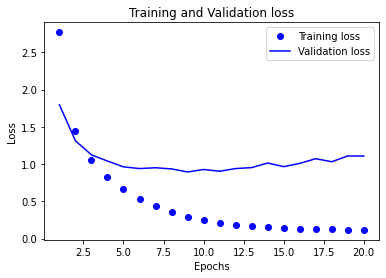

In [33]:
# 1. ploting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

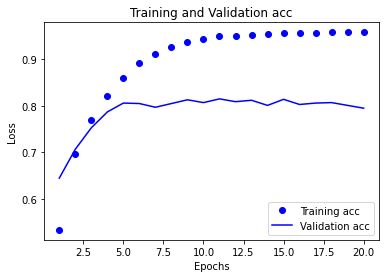

In [34]:
# 2. ploting the training and validation accuracy
plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 七、改变网络参数

In [41]:
# Re-training a model from scratch
from keras import losses
from keras import metrics
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss = losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

model.fit(partial_x_train, 
          partial_y_train,
          epochs=9, 
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, ont_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 6s 764us/step - loss: 2.7684 - categorical_accuracy: 0.5177 - val_loss: 1.8020 - val_categorical_accuracy: 0.6520
Epoch 2/9
7982/7982 [==============================] - 3s 364us/step - loss: 1.4414 - categorical_accuracy: 0.7116 - val_loss: 1.3128 - val_categorical_accuracy: 0.6990
Epoch 3/9
7982/7982 [==============================] - 3s 369us/step - loss: 1.0416 - categorical_accuracy: 0.7794 - val_loss: 1.1194 - val_categorical_accuracy: 0.7600
Epoch 4/9
7982/7982 [==============================] - 3s 360us/step - loss: 0.8219 - categorical_accuracy: 0.8224 - val_loss: 1.0349 - val_categorical_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 3s 355us/step - loss: 0.6581 - categorical_accuracy: 0.8611 - val_loss: 0.9786 - val_categorical_accuracy: 0.7940
Epoch 6/9
7982/7982 [==============================] - 3s 354us/step - loss: 0.5259 - categorical_accuracy:

[0.9760000412738016, 0.7853962779045105]